Initial guess [muR, deltaS]: [np.float64(0.3053467646037885), np.float64(9.98810389166831)]

Fitted parameters:
  μ_R = 3.0498
  ΔS = 9.9881
Final negative log-likelihood: -882.46


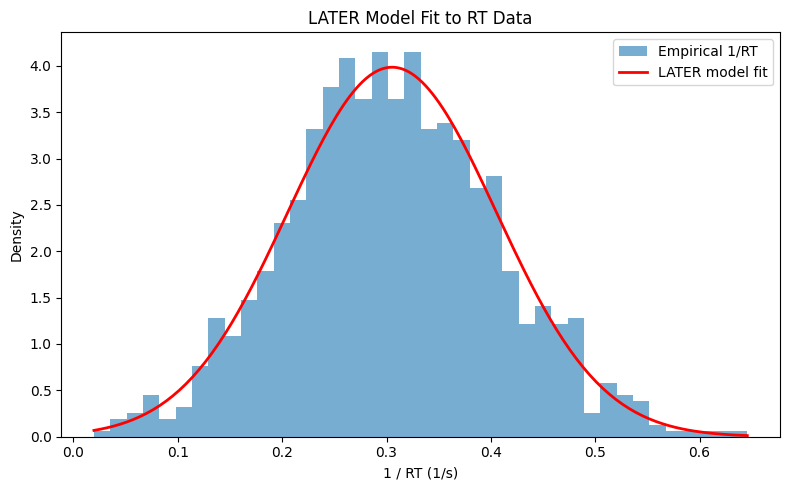

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# ============================================================
# 1. GET DATA
# ============================================================
# In MATLAB: data = later_getData([], [], 0.2);
# Here we simulate some data for illustration.
# You can replace this with your own RT array.

true_muR = 3.0       # true underlying mu_R (mean rate)
true_deltaS = 10.0   # true underlying delta_S (distance to threshold)
true_mu = true_muR / true_deltaS
true_sigma = 1 / true_deltaS

# Simulate RT data according to LATER model
n_trials = 1000
invRTs_sim = np.random.normal(loc=true_mu, scale=true_sigma, size=n_trials)
RTs = 1 / invRTs_sim  # convert back to RTs

# Remove any invalid (e.g., negative) RTs that can arise from tails
RTs = RTs[RTs > 0]

# ============================================================
# 2. DEFINE OBJECTIVE FUNCTION (NEGATIVE LOG-LIKELIHOOD)
# ============================================================

# smaller negative likelihood = better fit / higher likelihood!

def later_nll(params, RTs):
    """
    Negative log-likelihood for LATER model.
    params: [muR, deltaS]
    RTs: array of reaction times
    """
    muR, deltaS = params
    # Enforce positivity to avoid invalid values 
    # rate of rise and distance to threshold can't be negative
    if muR <= 0 or deltaS <= 0:
        return np.inf

    mu = muR / deltaS
    sigma = 1 / deltaS
    invRTs = 1 / RTs

    log_probs = norm.logpdf(invRTs, loc=mu, scale=sigma)
    nll = -np.sum(log_probs)
        #sum all the log probabilities to get total log likelihood, make negative to get nll
    return nll

# ============================================================
# 3. DEFINE INITIAL CONDITIONS AND BOUNDS
# ============================================================
initial_muR = np.mean(1/RTs)
initial_deltaS = 1/np.std(1/RTs)
initial_guess = [initial_muR, initial_deltaS]

bounds = [(0.001, 1000), (0.001, 1000)]

print("Initial guess [muR, deltaS]:", initial_guess)

# ============================================================
# 4. RUN THE FIT (MAXIMUM LIKELIHOOD ESTIMATION)
# ============================================================
result = minimize(later_nll, initial_guess, args=(RTs,), bounds=bounds)

if not result.success:
    print("Optimization did not converge:", result.message)

muR_fit, deltaS_fit = result.x
print(f"\nFitted parameters:\n  μ_R = {muR_fit:.4f}\n  ΔS = {deltaS_fit:.4f}")
print(f"Final negative log-likelihood: {result.fun:.2f}")

# ============================================================
# 5. EVALUATE & PLOT THE FIT
# ============================================================

# Empirical distribution of 1/RT
invRTs = 1 / RTs

# Model fit parameters → Gaussian over 1/RT
mu_fit = muR_fit / deltaS_fit
sigma_fit = 1 / deltaS_fit

x_vals = np.linspace(min(invRTs), max(invRTs), 200)
pdf_fit = norm.pdf(x_vals, loc=mu_fit, scale=sigma_fit)

plt.figure(figsize=(8,5))
plt.hist(invRTs, bins=40, density=True, alpha=0.6, label='Empirical 1/RT')
plt.plot(x_vals, pdf_fit, 'r-', lw=2, label='LATER model fit')
plt.xlabel('1 / RT (1/s)')
plt.ylabel('Density')
plt.title('LATER Model Fit to RT Data')
plt.legend()
plt.tight_layout()
plt.show()


How do you know if you got a reasonable answer?
- Make sure the parameters (u_R and deltaS) make sense for reaction time data.
- If the LATER model fit (red line) overlays well with the data (blue), that suggests the model is reasonable.
- A lower negative log likelihood also indicates a better fit/more reasonable model. 